## The aim is to graph a plotbar with the amount of emails in "Application" and "rejected" folders. These two folder were created by my in my outlook App.

In [29]:
# Documentation : https://docs.microsoft.com/en-us/office/vba/api/outlook.oldefaultfolders

In [30]:
#pip install pywin32

In [42]:
import numpy as np
from scipy import stats
import pandas as pd
import time
#import math
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from pathlib import Path

In [32]:
import win32com.client  #pip install pywin32

In [33]:
# Connect to outlook
outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")

In [130]:
import time

In [138]:
# Connect to folder
inbox_reject = outlook.Folders("pablocalatayudpelayo@gmail.com").Folders("rejected")
messages_rejected = inbox_reject.Items

dates_reject=[]

messages = inbox_reject.Items

for message in messages:
    
    subject = message.Subject
    body = message.body
    attachments = message.Attachments
    dates_reject.append(message.SentOn.strftime("%Y-%m-%d"))

In [139]:
# Connect to folder <Applications>
inbox_application = outlook.Folders("pablocalatayudpelayo@gmail.com").Folders("Applications")
messages_application = inbox_application.Items
dates_application=[]
messages = inbox_application.Items
for message in messages:
    
    subject = message.Subject
    body = message.body
    attachments = message.Attachments
    dates_application.append(message.SentOn.strftime("%Y-%m-%d"))

In [141]:
print("Number of emails in Application Folder: ",len(dates_application))

Number of emails in Application Folder:  1180


In [142]:
print("Number of emails in Rejected Folder: ",len(dates_reject))

Number of emails in Rejected Folder:  199


# Create Data Frame - group by

In [326]:
start = "06-01-2022"
end = "12-31-2022"
idx = pd.date_range(start, end, freq="D")
ts = pd.Series(range(len(idx)), index=idx)

In [327]:
ts = pd.Series(range(len(idx)), index=idx)

In [328]:
ts.index

DatetimeIndex(['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
               '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=214, freq='D')

In [329]:
count_emils = pd.DataFrame(index=ts.index,columns = ["Applications","Rejections"])

In [330]:
count_emils["Date"]=count_emils.index

In [331]:
count_emils

,Applications,Rejections,Date
2022-06-01,NaN,NaN,2022-06-01
2022-06-02,NaN,NaN,2022-06-02
2022-06-03,NaN,NaN,2022-06-03
2022-06-04,NaN,NaN,2022-06-04
2022-06-05,NaN,NaN,2022-06-05
...,...,...,...
2022-12-27,NaN,NaN,2022-12-27
2022-12-28,NaN,NaN,2022-12-28
2022-12-29,NaN,NaN,2022-12-29
2022-12-30,NaN,NaN,2022-12-30


In [332]:
for i in count_emils.index:
    
    day = str(i)[0:10]
    
    app = dates_application.count(day)
    rej = dates_reject.count(day)

    count_emils.loc[day]=[app,rej,count_emils.loc[day]["Date"]]

In [333]:
count_emils.tail(3)

,Applications,Rejections,Date
2022-12-29,0,0,2022-12-29
2022-12-30,0,0,2022-12-30
2022-12-31,0,0,2022-12-31


In [334]:
import numpy as np
import matplotlib.pyplot as plt

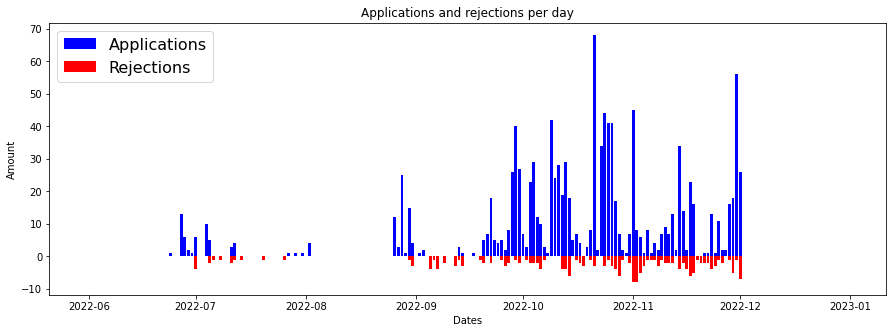

In [335]:
# Create bars
plt.figure(figsize=(15,5))
plt.bar(count_emils.index, count_emils.Applications,color='blue',label="Applications")
plt.bar(count_emils.index, -count_emils.Rejections,color='red',label="Rejections")
plt.title("Applications and rejections per day")
plt.ylabel("Amount")
plt.xlabel("Dates")
plt.legend(loc = "upper left",fontsize=16)
plt.show()

# Grouping by Weeks

In [336]:
count_emils.head(3)

,Applications,Rejections,Date
2022-06-01,0,0,2022-06-01
2022-06-02,0,0,2022-06-02
2022-06-03,0,0,2022-06-03


In [337]:
count_emils_groupby_week = count_emils.resample('W', on='Date')['Applications','Rejections'].sum()

In [338]:
count_emils_groupby_week.head(4)

,Applications,Rejections
Date,,
2022-06-05,0,0
2022-06-12,0,0
2022-06-19,0,0
2022-06-26,1,0


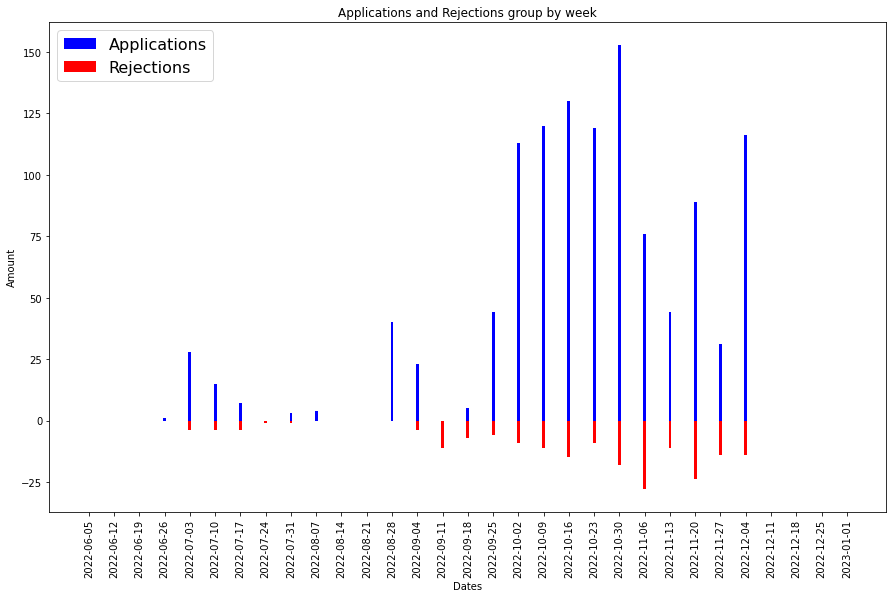

In [339]:
plt.figure(figsize=(15,9))
plt.bar(count_emils_groupby_week.index, count_emils_groupby_week.Applications,color='blue',label="Applications")
plt.bar(count_emils_groupby_week.index, -count_emils_groupby_week.Rejections,color='red',label="Rejections")
plt.title("Applications and Rejections group by week")
plt.ylabel("Amount")
plt.xlabel("Dates")
plt.xticks(count_emils_groupby_week.index,rotation = 90)
plt.legend(loc = "upper left",fontsize=16)
plt.show()